In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
df = pd.read_csv("/kaggle/input/united-states-marriage-statistics/Week 30 - United States Marriage Status 2005 to 2017.csv")

# Display the first few rows of the dataset
df.head()


,index,Year,Gender,Age Group,Metric,Estimated Percent,Estimated Population
0,0,2008,Male,15 to 19 years,Total,1.0,11241214
1,1,2008,Male,20 to 34 years,Total,1.0,31342886
2,2,2008,Male,35 to 44 years,Total,1.0,21426309
3,3,2008,Male,45 to 54 years,Total,1.0,21889603
4,4,2008,Male,55 to 64 years,Total,1.0,16251184


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 936 non-null    int64  
 1   Year                  936 non-null    int64  
 2   Gender                936 non-null    object 
 3   Age Group             936 non-null    object 
 4   Metric                936 non-null    object 
 5   Estimated Percent     936 non-null    float64
 6   Estimated Population  936 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 51.3+ KB


In [3]:
df.describe()

,index,Year,Estimated Percent,Estimated Population
count,936.000000,936.000000,936.000000,9.360000e+02
mean,467.500000,2011.000000,0.333333,6.936859e+06
std,270.344225,3.743658,0.383275,8.323534e+06
min,0.000000,2005.000000,0.000000,0.000000e+00
25%,233.750000,2008.000000,0.025000,4.806748e+05
50%,467.500000,2011.000000,0.130500,2.596156e+06
75%,701.250000,2014.000000,0.635000,1.201978e+07
max,935.000000,2017.000000,1.000000,3.402447e+07


**How is the data distributed across different years?**

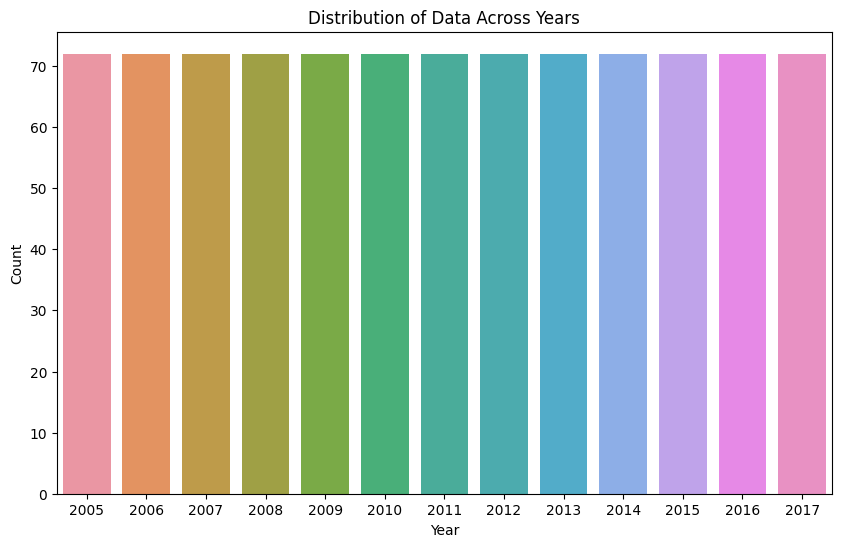

In [4]:
# Countplot to visualize the distribution of data across years
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Data Across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


**What is the overall distribution of gender in the dataset?**

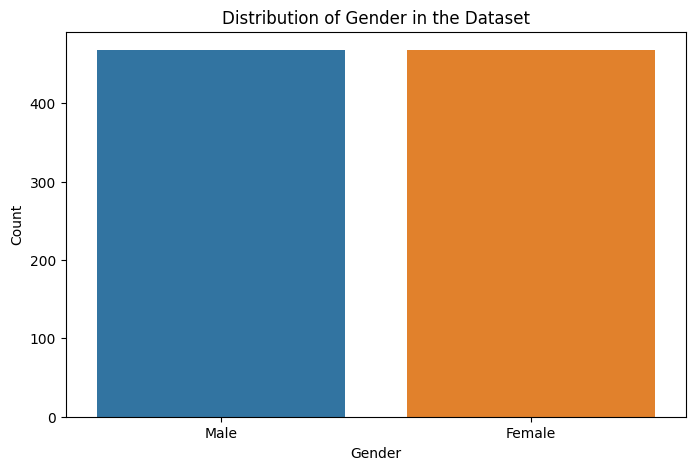

In [5]:
# Countplot to visualize the distribution of gender in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**How are different age groups represented in the dataset?**

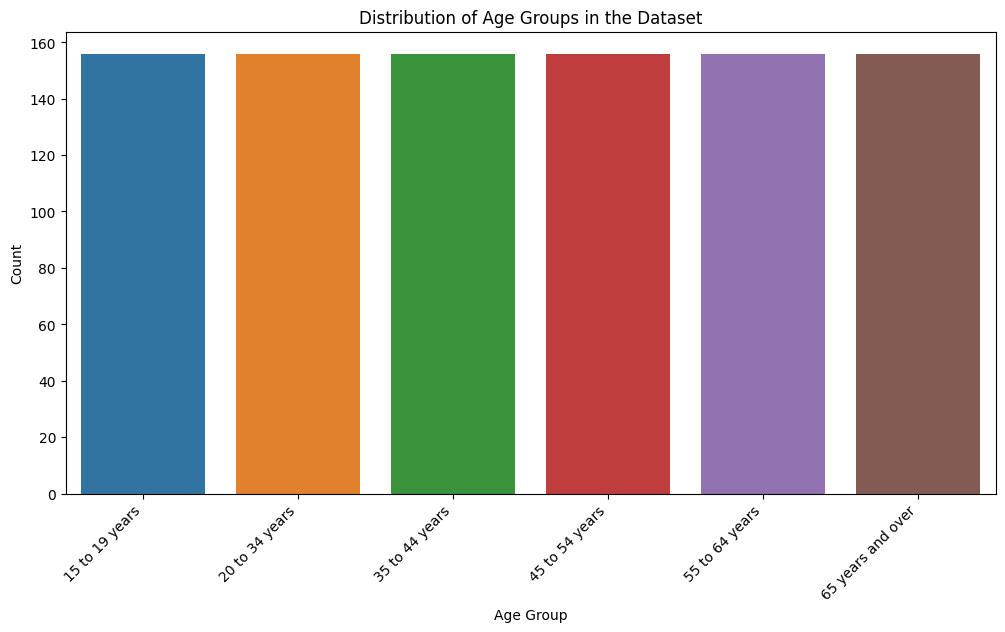

In [6]:
# Countplot to visualize the distribution of age groups
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', data=df, order=df['Age Group'].value_counts().index)
plt.title('Distribution of Age Groups in the Dataset')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the relationship between the estimated percent and estimated population?**

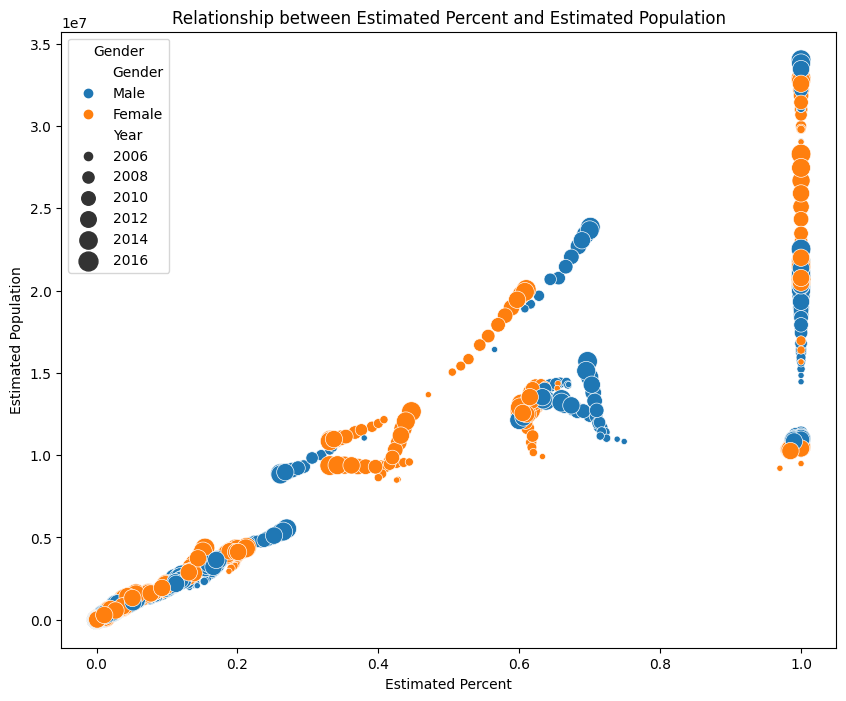

In [7]:
# Scatter plot to explore the relationship between Estimated Percent and Estimated Population
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Estimated Percent', y='Estimated Population', data=df, hue='Gender', size='Year', sizes=(20, 200))
plt.title('Relationship between Estimated Percent and Estimated Population')
plt.xlabel('Estimated Percent')
plt.ylabel('Estimated Population')
plt.legend(title='Gender')
plt.show()


**How has the overall marriage rate changed over the years?**

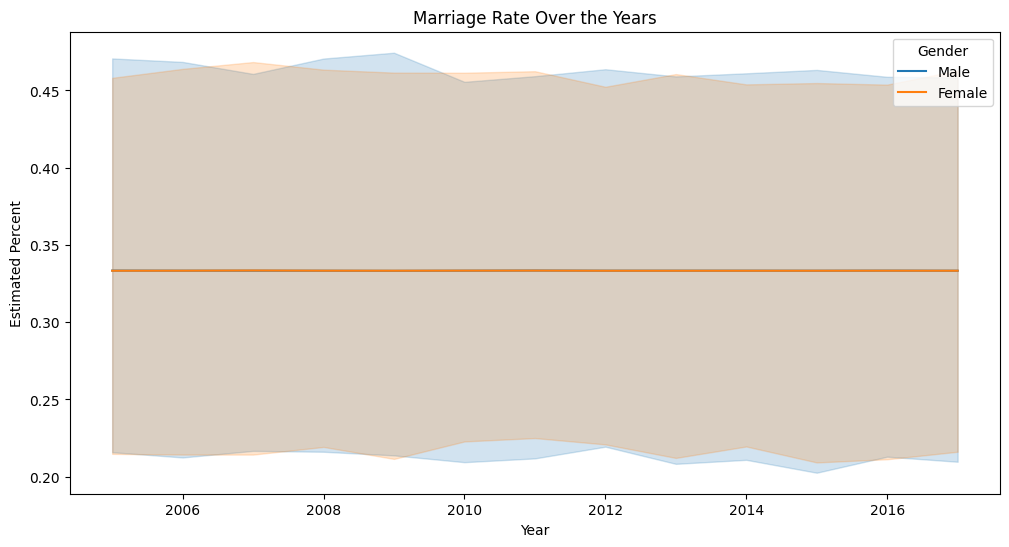

In [8]:
# Line plot to show the trend of marriage rates over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Estimated Percent', data=df, hue='Gender')
plt.title('Marriage Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.legend(title='Gender')
plt.show()


**Can we visualize the distribution of estimated population across different age groups and genders?**

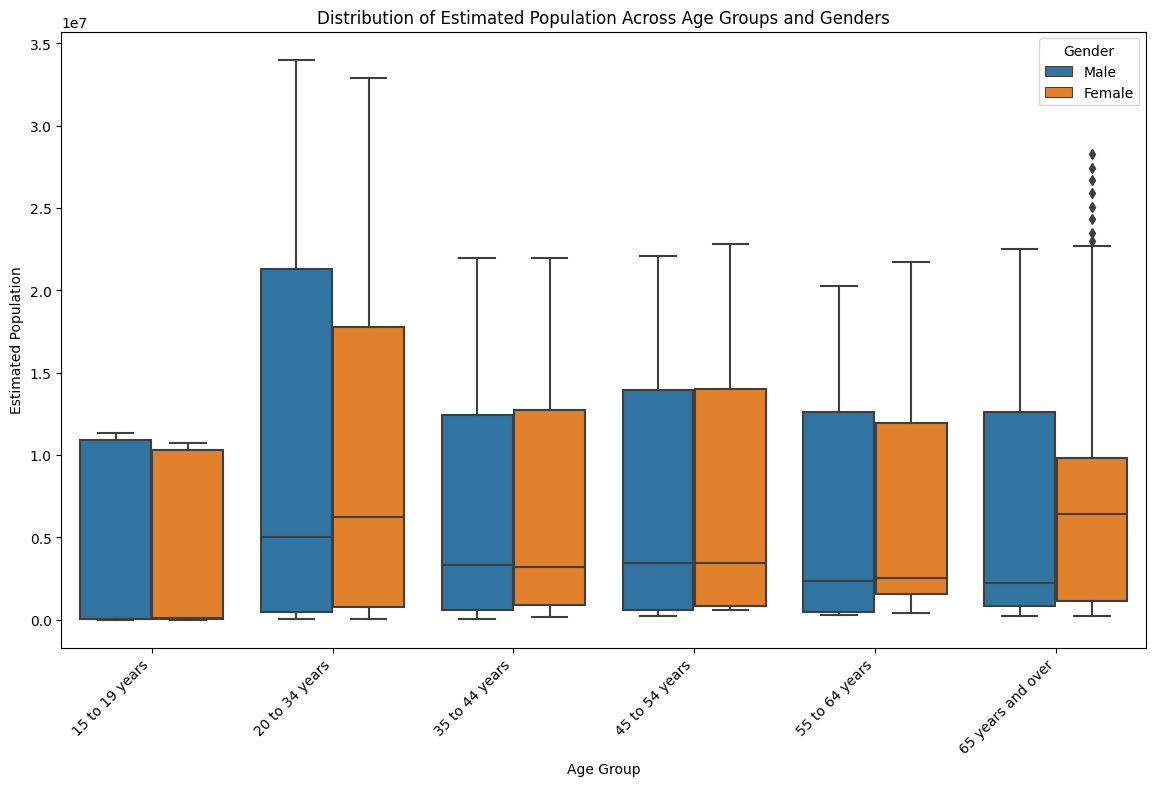

In [9]:
# Boxplot to visualize the distribution of estimated population across age groups and genders
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age Group', y='Estimated Population', hue='Gender', data=df)
plt.title('Distribution of Estimated Population Across Age Groups and Genders')
plt.xlabel('Age Group')
plt.ylabel('Estimated Population')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the proportion of different metrics in the dataset?**

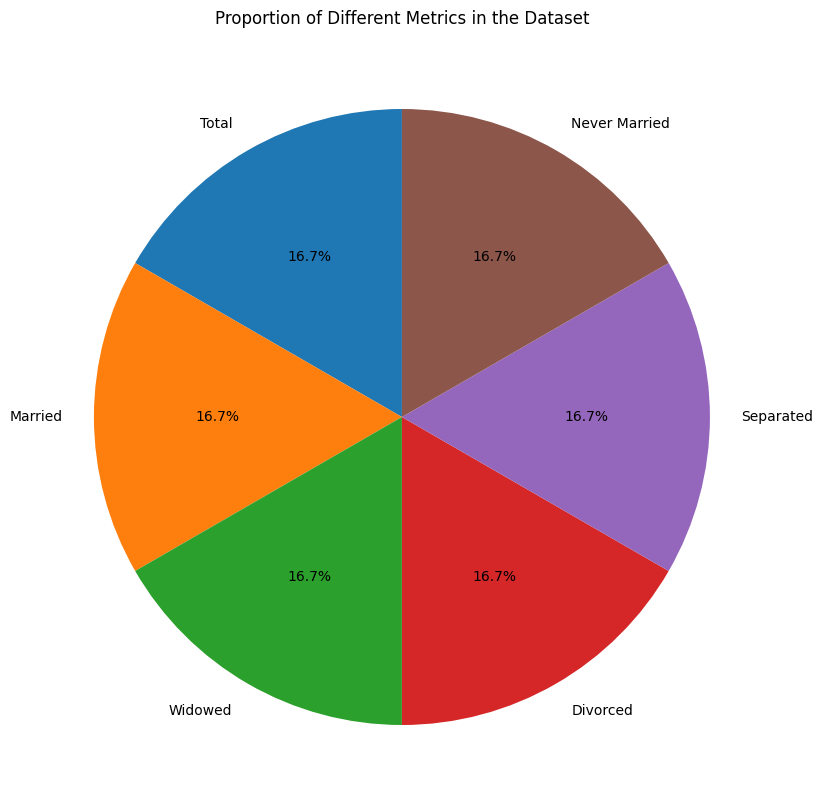

In [10]:
# Pie chart to show the proportion of different metrics in the dataset
metric_counts = df['Metric'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(metric_counts, labels=metric_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Different Metrics in the Dataset')
plt.show()


**Can we explore the correlation between estimated percent and estimated population?**

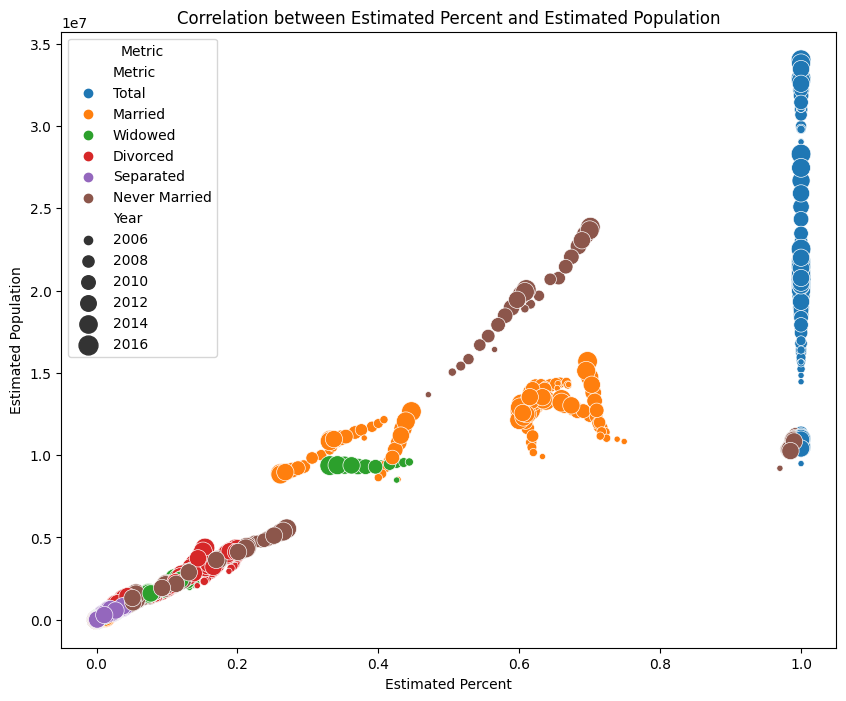

In [11]:
# Scatter plot to explore the correlation between Estimated Percent and Estimated Population
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Estimated Percent', y='Estimated Population', data=df, hue='Metric', size='Year', sizes=(20, 200))
plt.title('Correlation between Estimated Percent and Estimated Population')
plt.xlabel('Estimated Percent')
plt.ylabel('Estimated Population')
plt.legend(title='Metric')
plt.show()


**How has the estimated percent of different age groups changed over the years?**

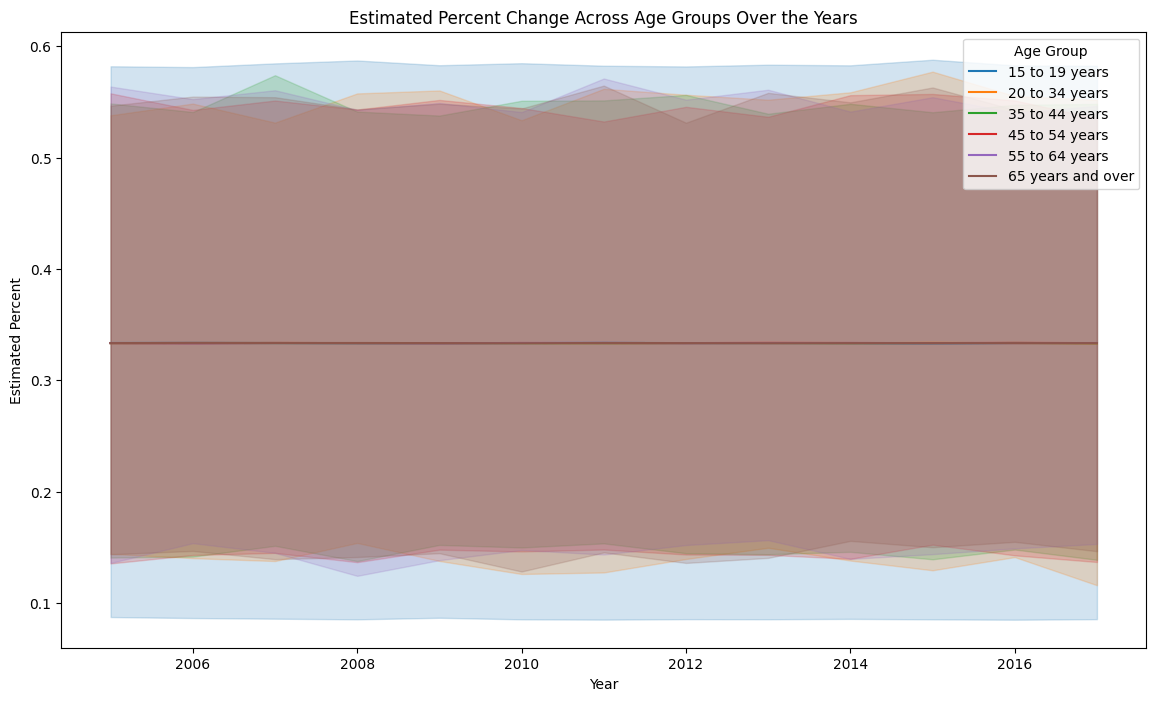

In [12]:
# Line plot to show the trend of estimated percent across age groups over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Estimated Percent', hue='Age Group', data=df)
plt.title('Estimated Percent Change Across Age Groups Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.legend(title='Age Group')
plt.show()


**What is the average estimated percent by gender and age group?**

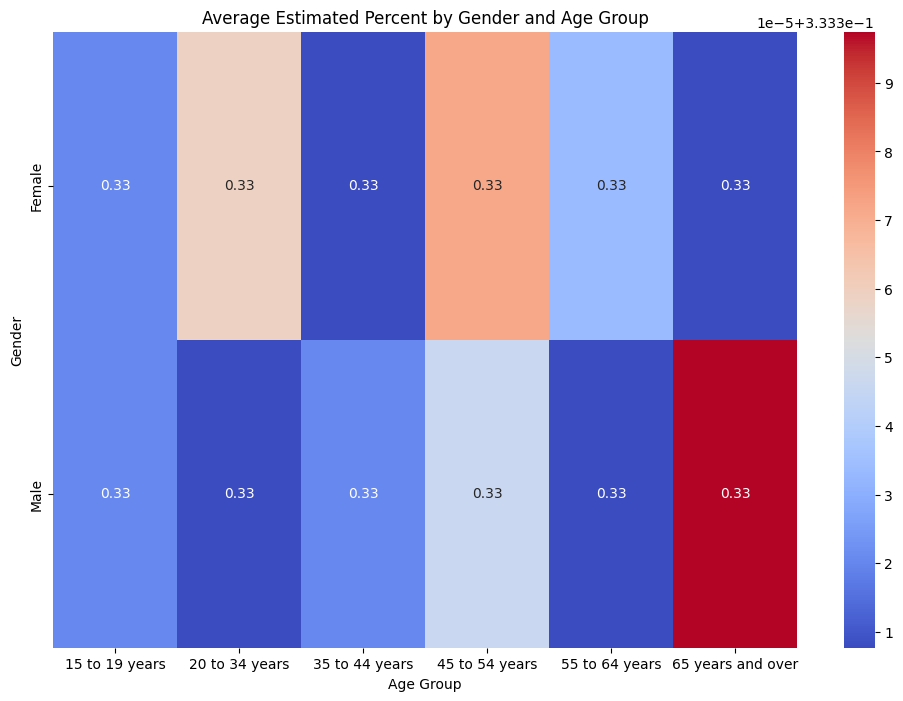

In [13]:
# Heatmap to visualize the average estimated percent by gender and age group
average_percent = df.groupby(['Gender', 'Age Group'])['Estimated Percent'].mean().reset_index()
pivot_table = average_percent.pivot_table(index='Gender', columns='Age Group', values='Estimated Percent')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Estimated Percent by Gender and Age Group')
plt.show()


**How are the estimated percent and population correlated for each gender?**

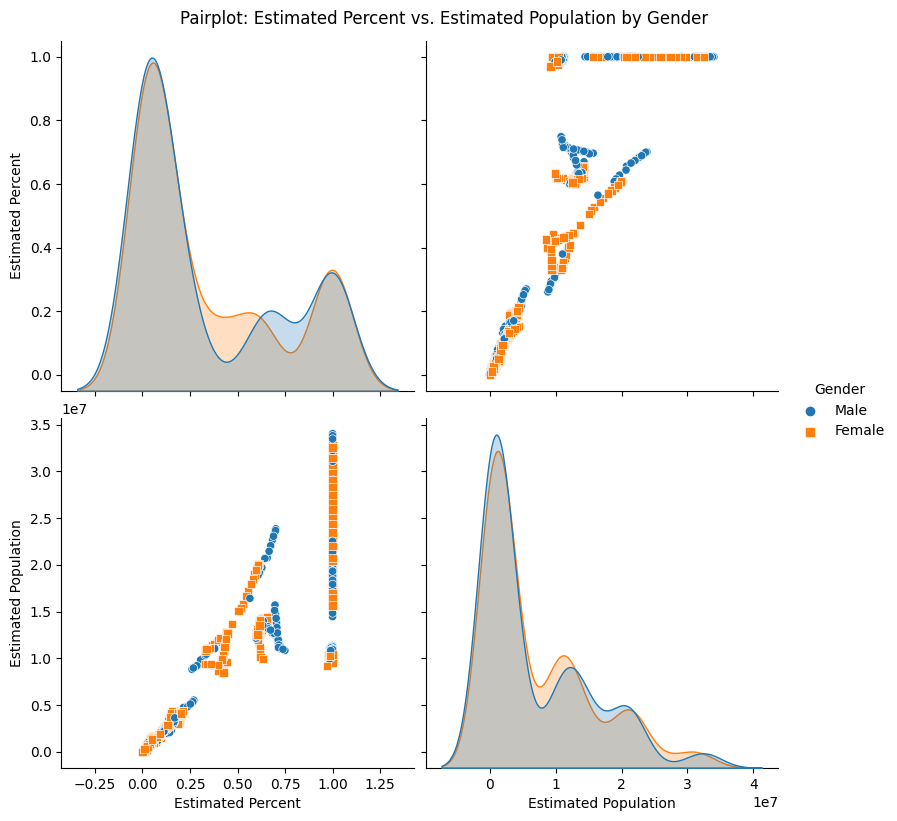

In [14]:
# Pairplot to explore the correlation between estimated percent and population for each gender
sns.pairplot(df, hue='Gender', vars=['Estimated Percent', 'Estimated Population'], markers=["o", "s"], height=4)
plt.suptitle('Pairplot: Estimated Percent vs. Estimated Population by Gender', y=1.02)
plt.show()


**Can we visualize the change in marriage rates for specific age groups using interactive plots?**

In [15]:
# Interactive line plot using Plotly Express
fig = px.line(df, x='Year', y='Estimated Percent', color='Age Group', markers=True,
              title='Marriage Rates Over the Years for Specific Age Groups')
fig.update_layout(xaxis_title='Year', yaxis_title='Estimated Percent')
fig.show()


**How does the estimated percent vary for different age groups within each gender?**

<Figure size 1400x800 with 0 Axes>

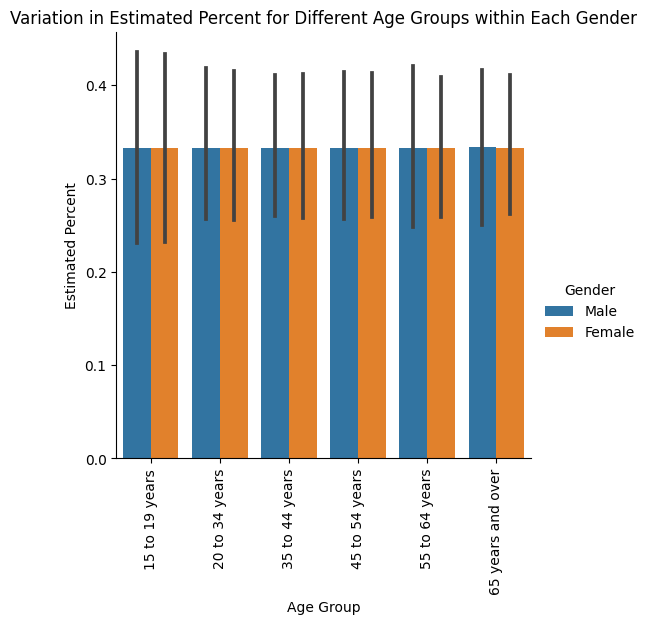

In [16]:
# Catplot to show the variation in estimated percent for different age groups within each gender
plt.figure(figsize=(14, 8))
sns.catplot(x='Age Group', y='Estimated Percent', hue='Gender', kind='bar', data=df)
plt.title('Variation in Estimated Percent for Different Age Groups within Each Gender')
plt.xlabel('Age Group')
plt.xticks(rotation=90)
plt.ylabel('Estimated Percent')
plt.show()


**Can we visualize the top 5 age groups with the highest estimated population?**

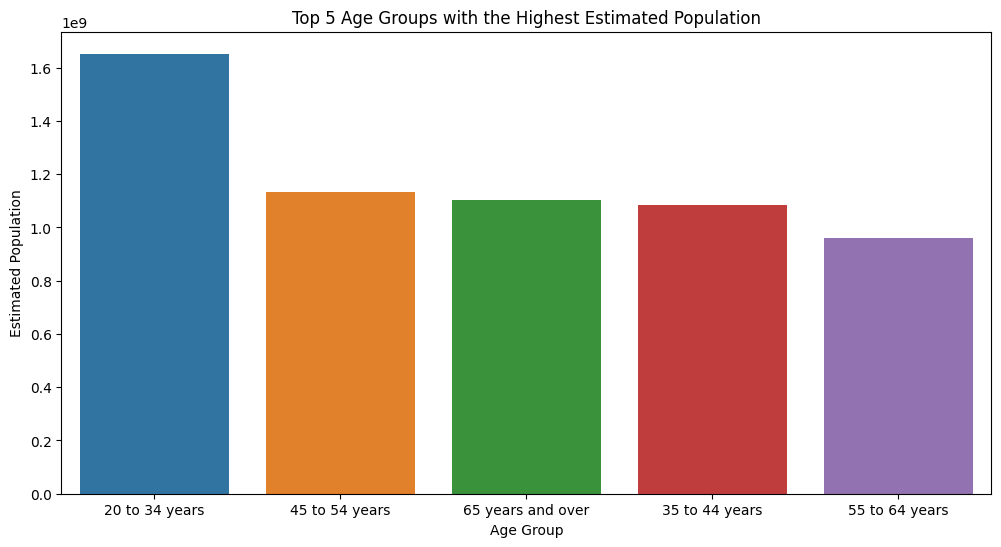

In [17]:
# Bar plot to visualize the top 5 age groups with the highest estimated population
top_age_groups = df.groupby('Age Group')['Estimated Population'].sum().nlargest(5).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Estimated Population', data=top_age_groups)
plt.title('Top 5 Age Groups with the Highest Estimated Population')
plt.xlabel('Age Group')
plt.ylabel('Estimated Population')
plt.show()


**What is the trend in marriage rates for each metric over the years?**

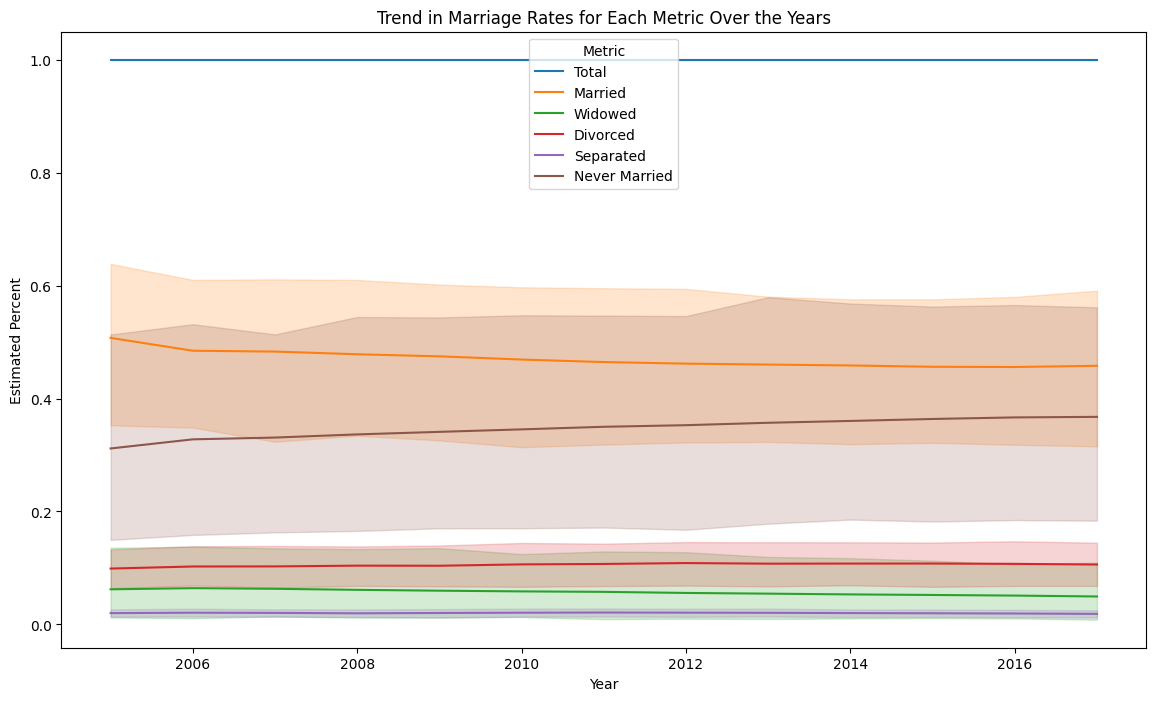

In [18]:
# Line plot to show the trend in marriage rates for each metric over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Estimated Percent', hue='Metric', data=df)
plt.title('Trend in Marriage Rates for Each Metric Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.legend(title='Metric')
plt.show()


**Can we explore the correlation between estimated percent and estimated population using a joint plot?**

<Figure size 1000x800 with 0 Axes>

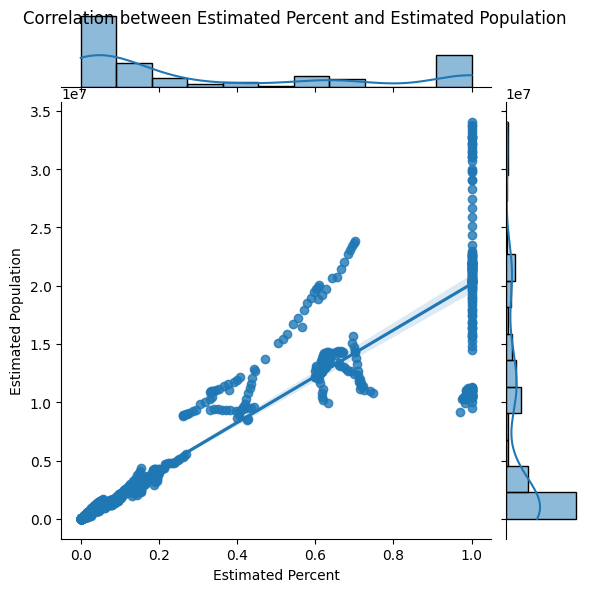

In [19]:
# Joint plot to explore the correlation between Estimated Percent and Estimated Population
plt.figure(figsize=(10, 8))
sns.jointplot(x='Estimated Percent', y='Estimated Population', data=df, kind='reg')
plt.suptitle('Correlation between Estimated Percent and Estimated Population')
plt.show()


**How are marriage rates distributed across age groups and genders using a heatmap?**

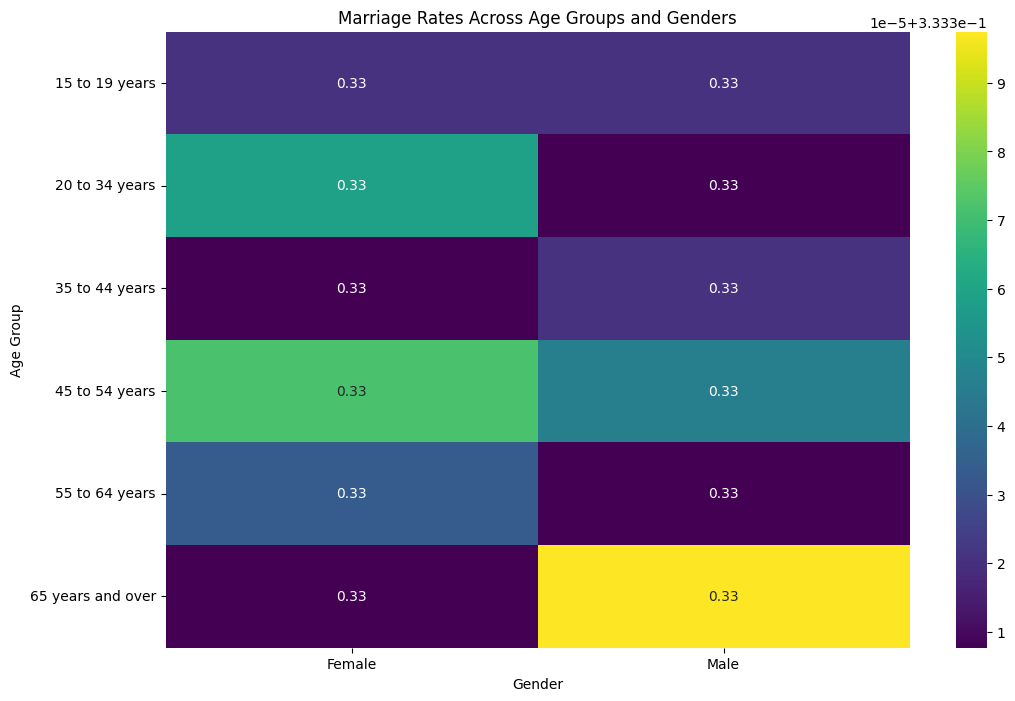

In [20]:
# Heatmap to visualize marriage rates across age groups and genders
pivot_table_marriage_rates = df.pivot_table(values='Estimated Percent', index='Age Group', columns='Gender', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_marriage_rates, cmap='viridis', annot=True, fmt='.2f')
plt.title('Marriage Rates Across Age Groups and Genders')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()


**What is the distribution of estimated percent within each year?**

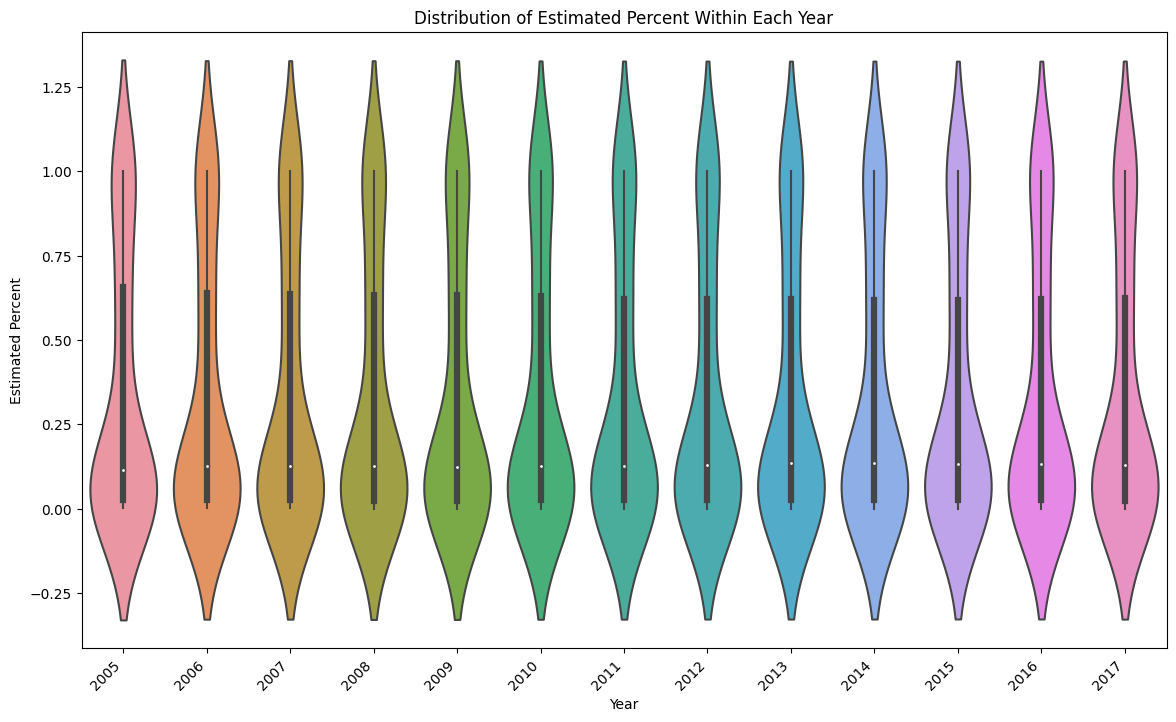

In [21]:
# Violin plot to visualize the distribution of estimated percent within each year
plt.figure(figsize=(14, 8))
sns.violinplot(x='Year', y='Estimated Percent', data=df)
plt.title('Distribution of Estimated Percent Within Each Year')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.xticks(rotation=45, ha='right')
plt.show()


**How can we compare the marriage rates between genders for specific age groups using an interactive plot?**

In [22]:
# Interactive plot using Plotly Express to compare marriage rates between genders for specific age groups
fig = px.bar(df, x='Age Group', y='Estimated Percent', color='Gender',
             title='Comparison of Marriage Rates Between Genders for Specific Age Groups')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Estimated Percent')
fig.show()


**Can we explore the trend in marriage rates for each gender using a line plot?**

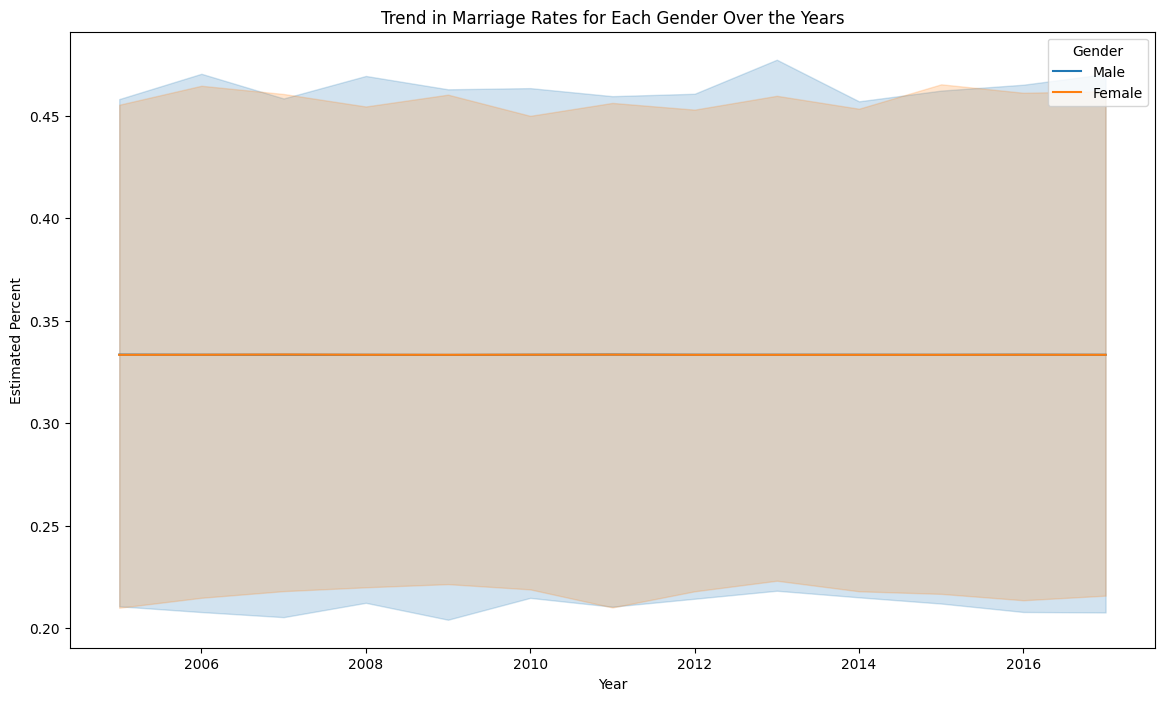

In [23]:
# Line plot to show the trend in marriage rates for each gender over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Estimated Percent', hue='Gender', data=df)
plt.title('Trend in Marriage Rates for Each Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.legend(title='Gender')
plt.show()


**How are the estimated percent and estimated population correlated for each age group?**

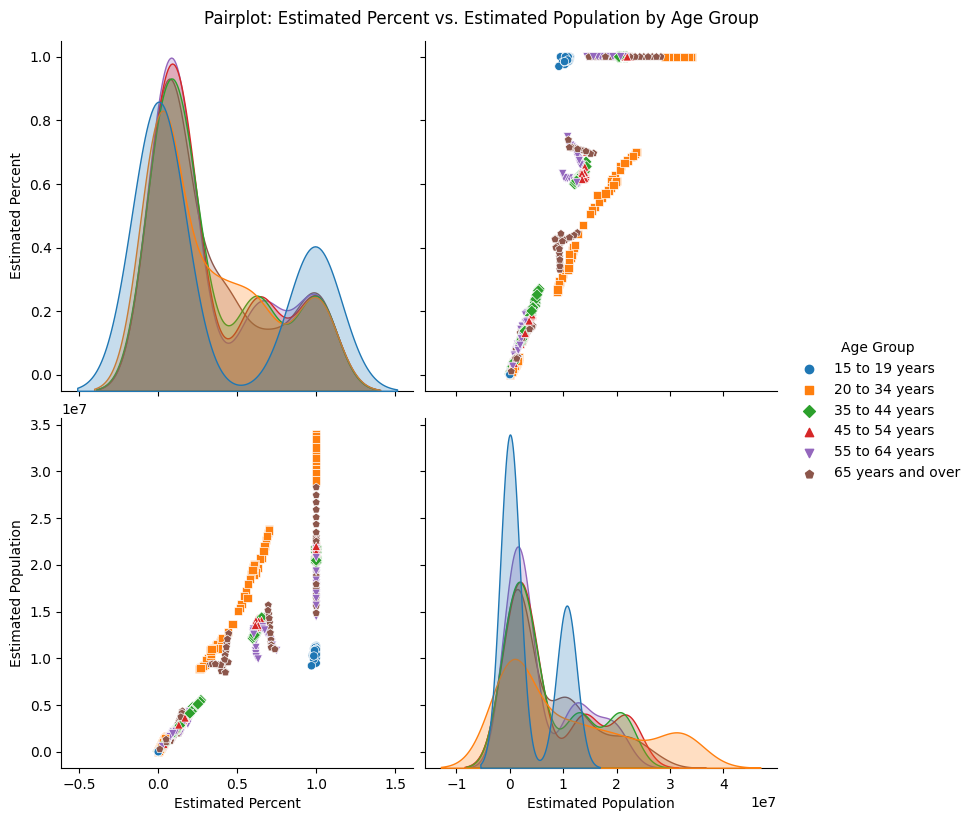

In [24]:
# Pairplot to explore the correlation between estimated percent and estimated population for each age group
sns.pairplot(df, hue='Age Group', vars=['Estimated Percent', 'Estimated Population'], height=4, markers=["o", "s", "D", "^", "v", "p"])
plt.suptitle('Pairplot: Estimated Percent vs. Estimated Population by Age Group', y=1.02)
plt.show()


**How does the relationship between estimated percent and estimated population vary across metrics?**

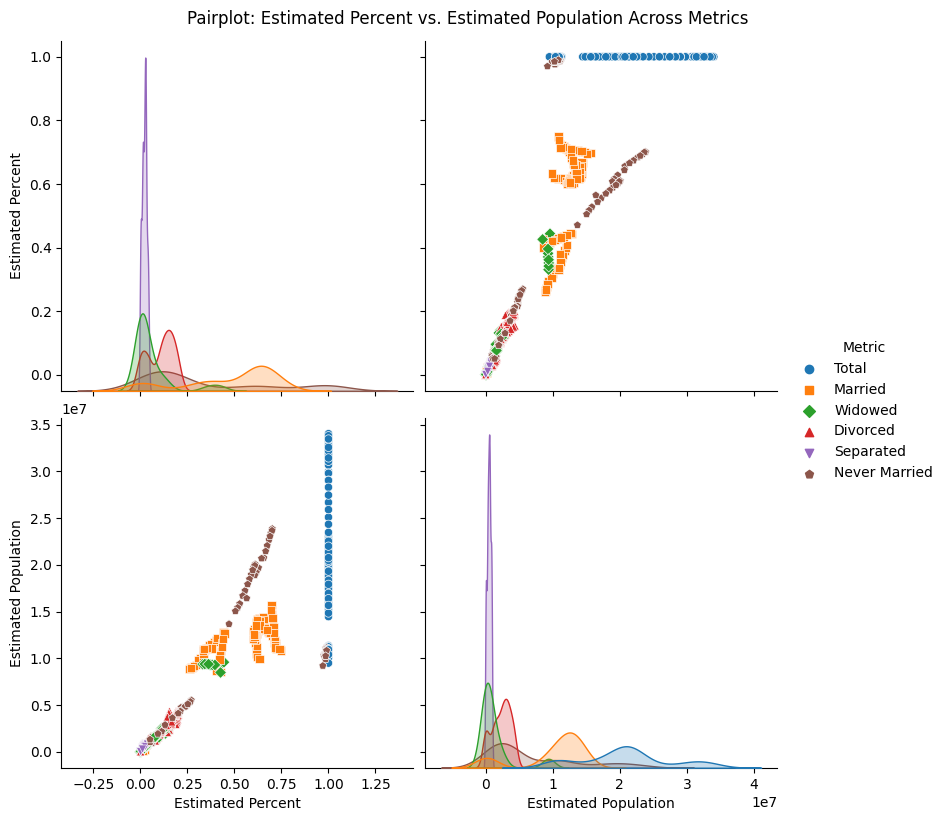

In [25]:
# Scatter plot matrix to explore the relationship between estimated percent and estimated population across metrics
sns.pairplot(df, hue='Metric', vars=['Estimated Percent', 'Estimated Population'], height=4, markers=["o", "s", "D", "^", "v", "p"])
plt.suptitle('Pairplot: Estimated Percent vs. Estimated Population Across Metrics', y=1.02)
plt.show()


**How do marriage rates vary for each age group over the years using an interactive line plot?**

In [26]:
# Interactive line plot using Plotly Express to show the variation in marriage rates for each age group over the years
fig = px.line(df, x='Year', y='Estimated Percent', color='Age Group',
              title='Marriage Rates Variation for Each Age Group Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Estimated Percent')
fig.show()


**Can we visualize the distribution of estimated percent within each gender for different metrics using a faceted scatter plot?**

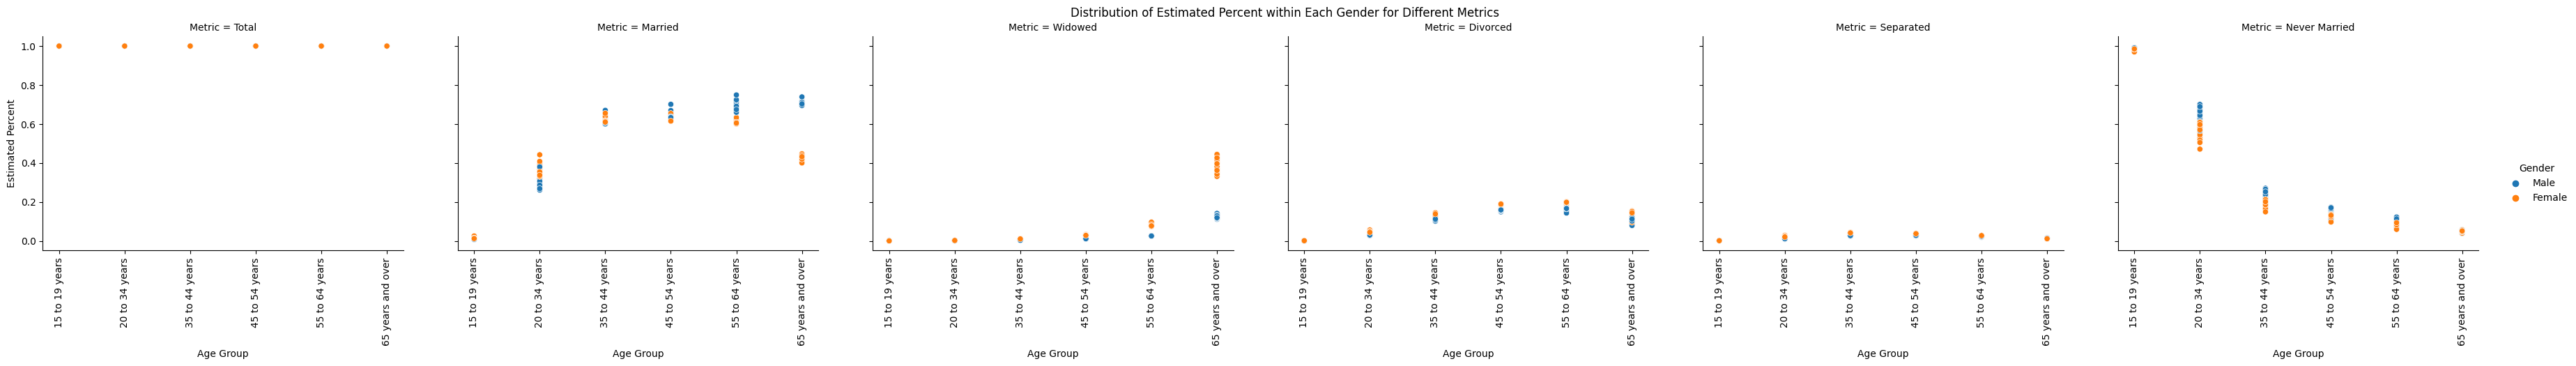

In [27]:
import warnings
warnings.filterwarnings('ignore')

g = sns.relplot(x='Age Group', y='Estimated Percent', hue='Gender', col='Metric', kind='scatter', data=df, height=4, aspect=1.5)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set title
g.fig.suptitle('Distribution of Estimated Percent within Each Gender for Different Metrics', y=1.02)

# Show the plot
plt.show()

**How does the estimated percent change for each age group within each metric over the years using an interactive plot?**

In [28]:
# Interactive plot using Plotly Express to show the change in estimated percent for each age group within each metric over the years
fig = px.line(df, x='Year', y='Estimated Percent', color='Age Group', facet_col='Metric',
              title='Change in Estimated Percent for Each Age Group within Each Metric Over the Years')
fig.update_layout(xaxis_title='Year', yaxis_title='Estimated Percent')
fig.show()


**Can we visualize the distribution of estimated population within each metric for specific age groups using a grouped bar plot?**

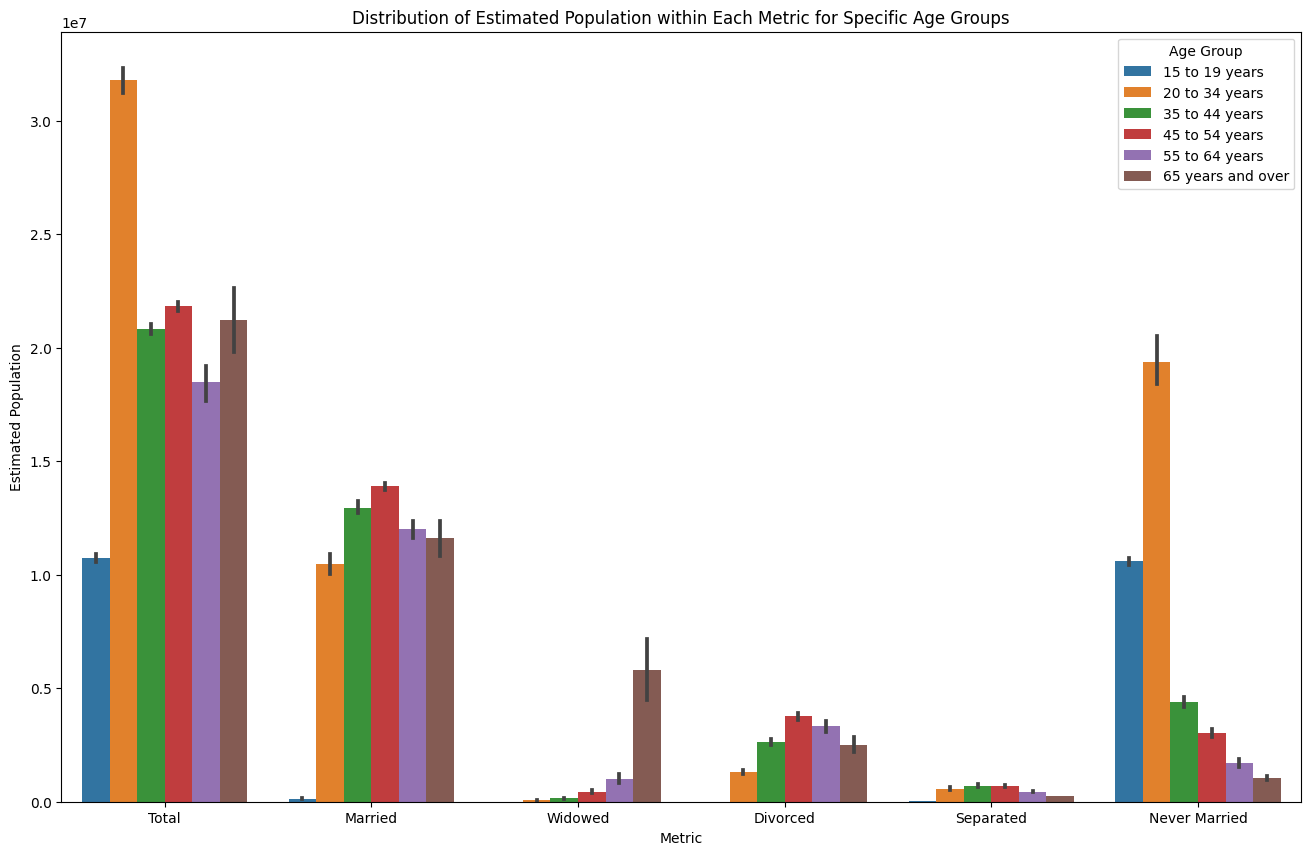

In [29]:
# Grouped bar plot using Seaborn to show the distribution of estimated population within each metric for specific age groups
plt.figure(figsize=(16, 10))
sns.barplot(x='Metric', y='Estimated Population', hue='Age Group', data=df)
plt.title('Distribution of Estimated Population within Each Metric for Specific Age Groups')
plt.xlabel('Metric')
plt.ylabel('Estimated Population')
plt.show()


**How does the estimated percent change over the years for each gender within each metric using a line plot?**

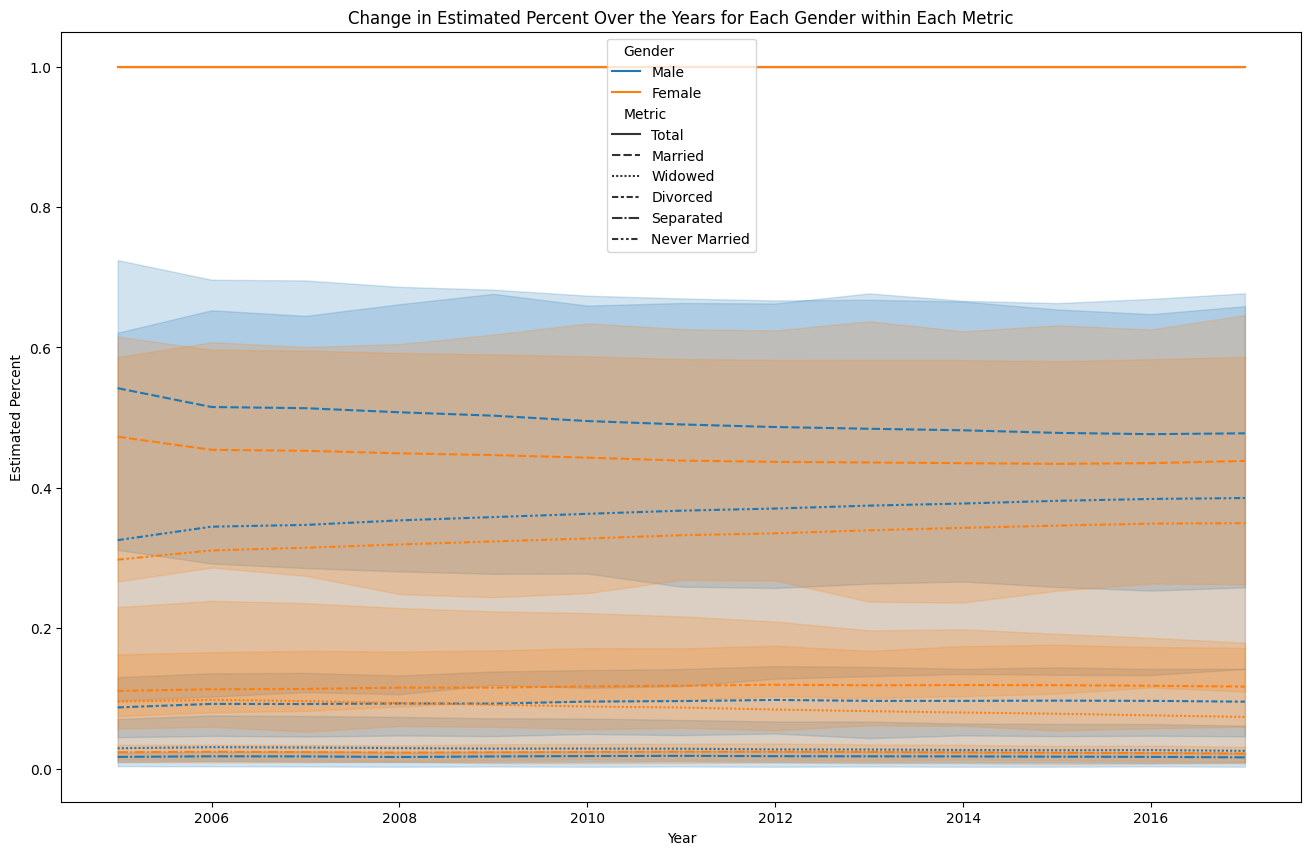

In [30]:
# Line plot using Seaborn to show the change in estimated percent over the years for each gender within each metric
plt.figure(figsize=(16, 10))
sns.lineplot(x='Year', y='Estimated Percent', hue='Gender', style='Metric', data=df)
plt.title('Change in Estimated Percent Over the Years for Each Gender within Each Metric')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.show()


**How can we compare the marriage rates between genders for each age group using a grouped bar plot?**

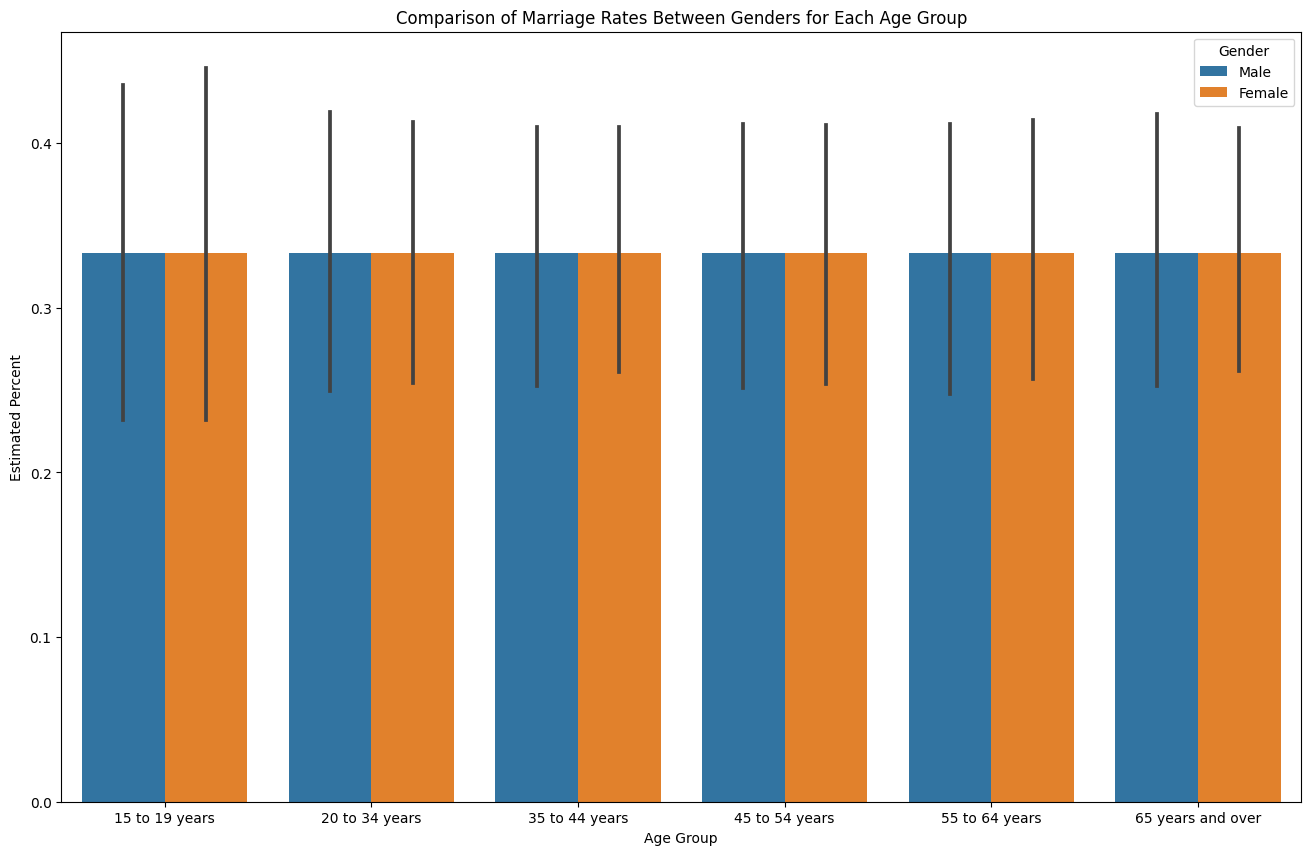

In [31]:
# Grouped bar plot using Seaborn to compare marriage rates between genders for each age group
plt.figure(figsize=(16, 10))
sns.barplot(x='Age Group', y='Estimated Percent', hue='Gender', data=df)
plt.title('Comparison of Marriage Rates Between Genders for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Estimated Percent')
plt.show()


**Can we visualize the distribution of estimated percent for different metrics within each age group using a swarm plot?**

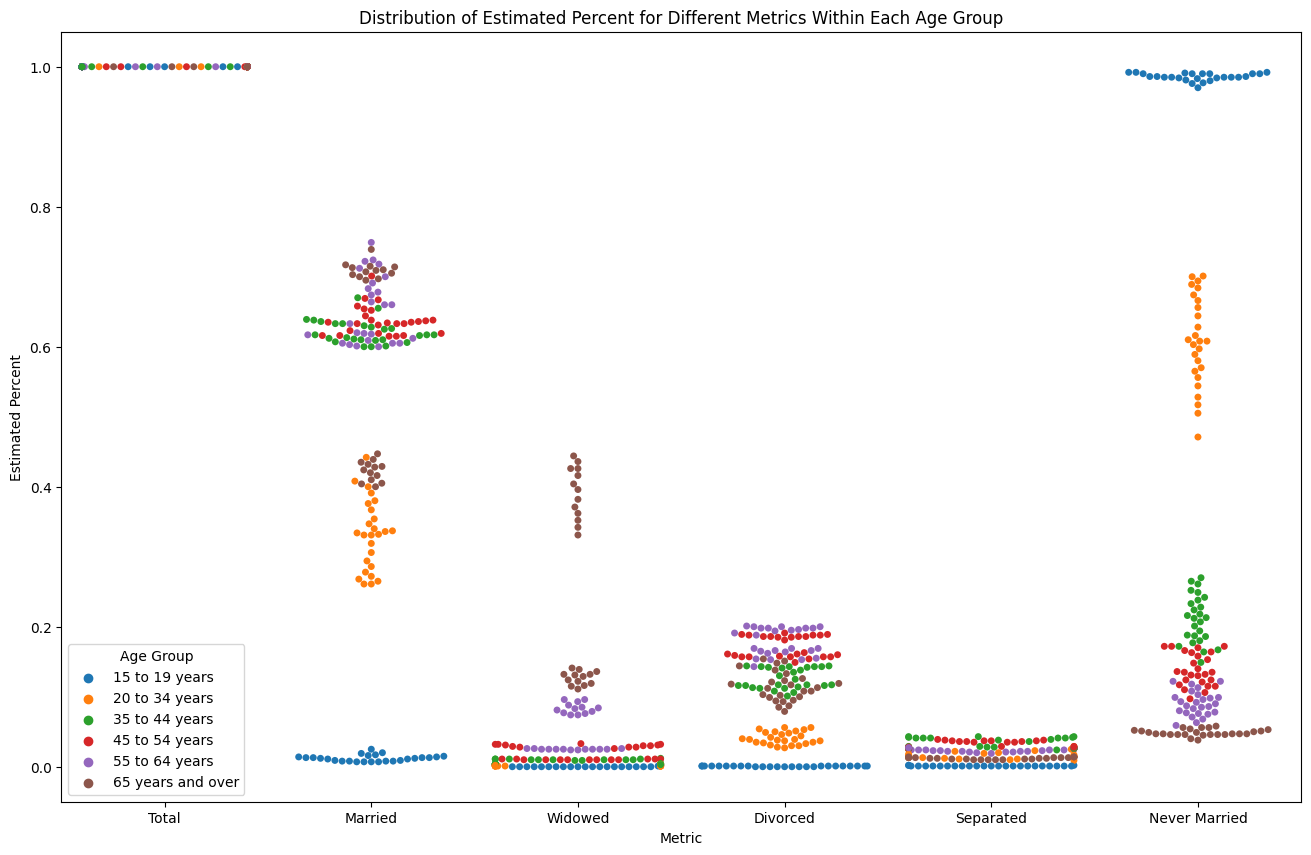

In [32]:
# Swarm plot to visualize the distribution of estimated percent for different metrics within each age group
plt.figure(figsize=(16, 10))
sns.swarmplot(x='Metric', y='Estimated Percent', hue='Age Group', data=df)
plt.title('Distribution of Estimated Percent for Different Metrics Within Each Age Group')
plt.xlabel('Metric')
plt.ylabel('Estimated Percent')
plt.show()


**How do the marriage rates vary between genders for specific age groups using an interactive scatter plot?**

In [33]:
# Interactive scatter plot using Plotly Express to show the variation in marriage rates between genders for specific age groups
fig = px.scatter(df, x='Age Group', y='Estimated Percent', color='Gender', size='Estimated Population',
                 title='Marriage Rates Variation Between Genders for Specific Age Groups')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Estimated Percent')
fig.show()


**Can we visualize the change in estimated percent over the years for specific age groups within each gender using a line plot?**

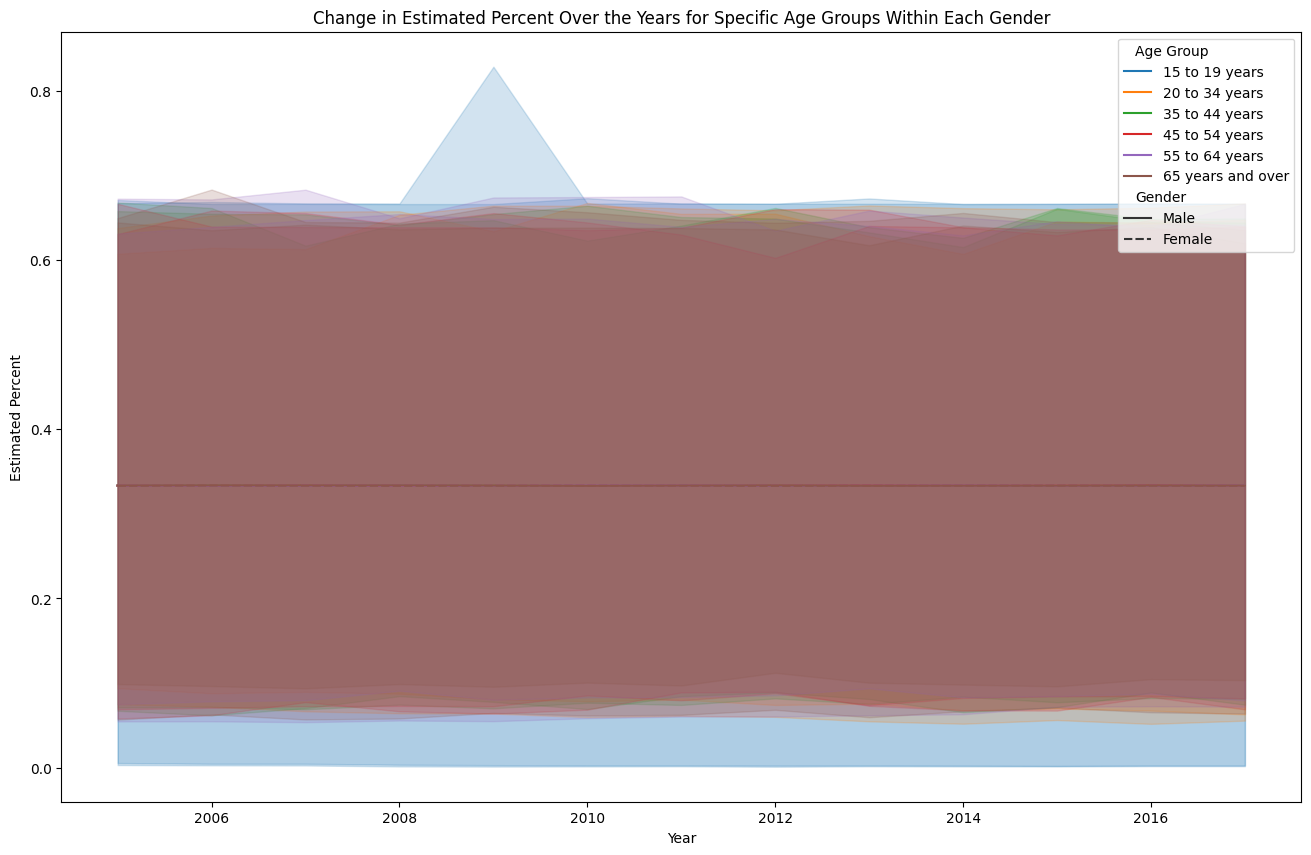

In [34]:
# Line plot to show the change in estimated percent over the years for specific age groups within each gender
plt.figure(figsize=(16, 10))
sns.lineplot(x='Year', y='Estimated Percent', hue='Age Group', style='Gender', data=df)
plt.title('Change in Estimated Percent Over the Years for Specific Age Groups Within Each Gender')
plt.xlabel('Year')
plt.ylabel('Estimated Percent')
plt.show()


**How does the estimated population vary between age groups and metrics using an interactive 3D scatter plot?**

In [35]:
# Interactive 3D scatter plot using Plotly Express to show the variation in estimated population between age groups and metrics
fig = px.scatter_3d(df, x='Age Group', y='Metric', z='Estimated Population', color='Gender',
                    title='Variation in Estimated Population Between Age Groups and Metrics')
fig.update_layout(scene=dict(xaxis_title='Age Group', yaxis_title='Metric', zaxis_title='Estimated Population'))
fig.show()
